In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('ggplot')
import os
print(os.listdir("./"))

['README.md', '.git', '137283134_3817208001667887_2676489019220915204_o.jpg', 'plots', 'Lokendra', 'sample_submission.csv', '.ipynb_checkpoints', 'AKASH', 'X_test.csv', 'X_train.csv', 'EDA.ipynb', 'De-noising_FFT.ipynb', 'y_train.csv']


In [42]:
X_train = pd.read_csv("./X_train.csv")
y_train = pd.read_csv("./y_train.csv")

In [43]:
def plot_series(series_id):
    plt.figure(figsize=(30,25))
    print(y_train[y_train['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(X_train[X_train.series_id == series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3,4,i+1)
        plt.plot(X_train[X_train.series_id == series_id][col], color = color)
        plt.title(col, fontdict={'fontsize':20,})

Concrete


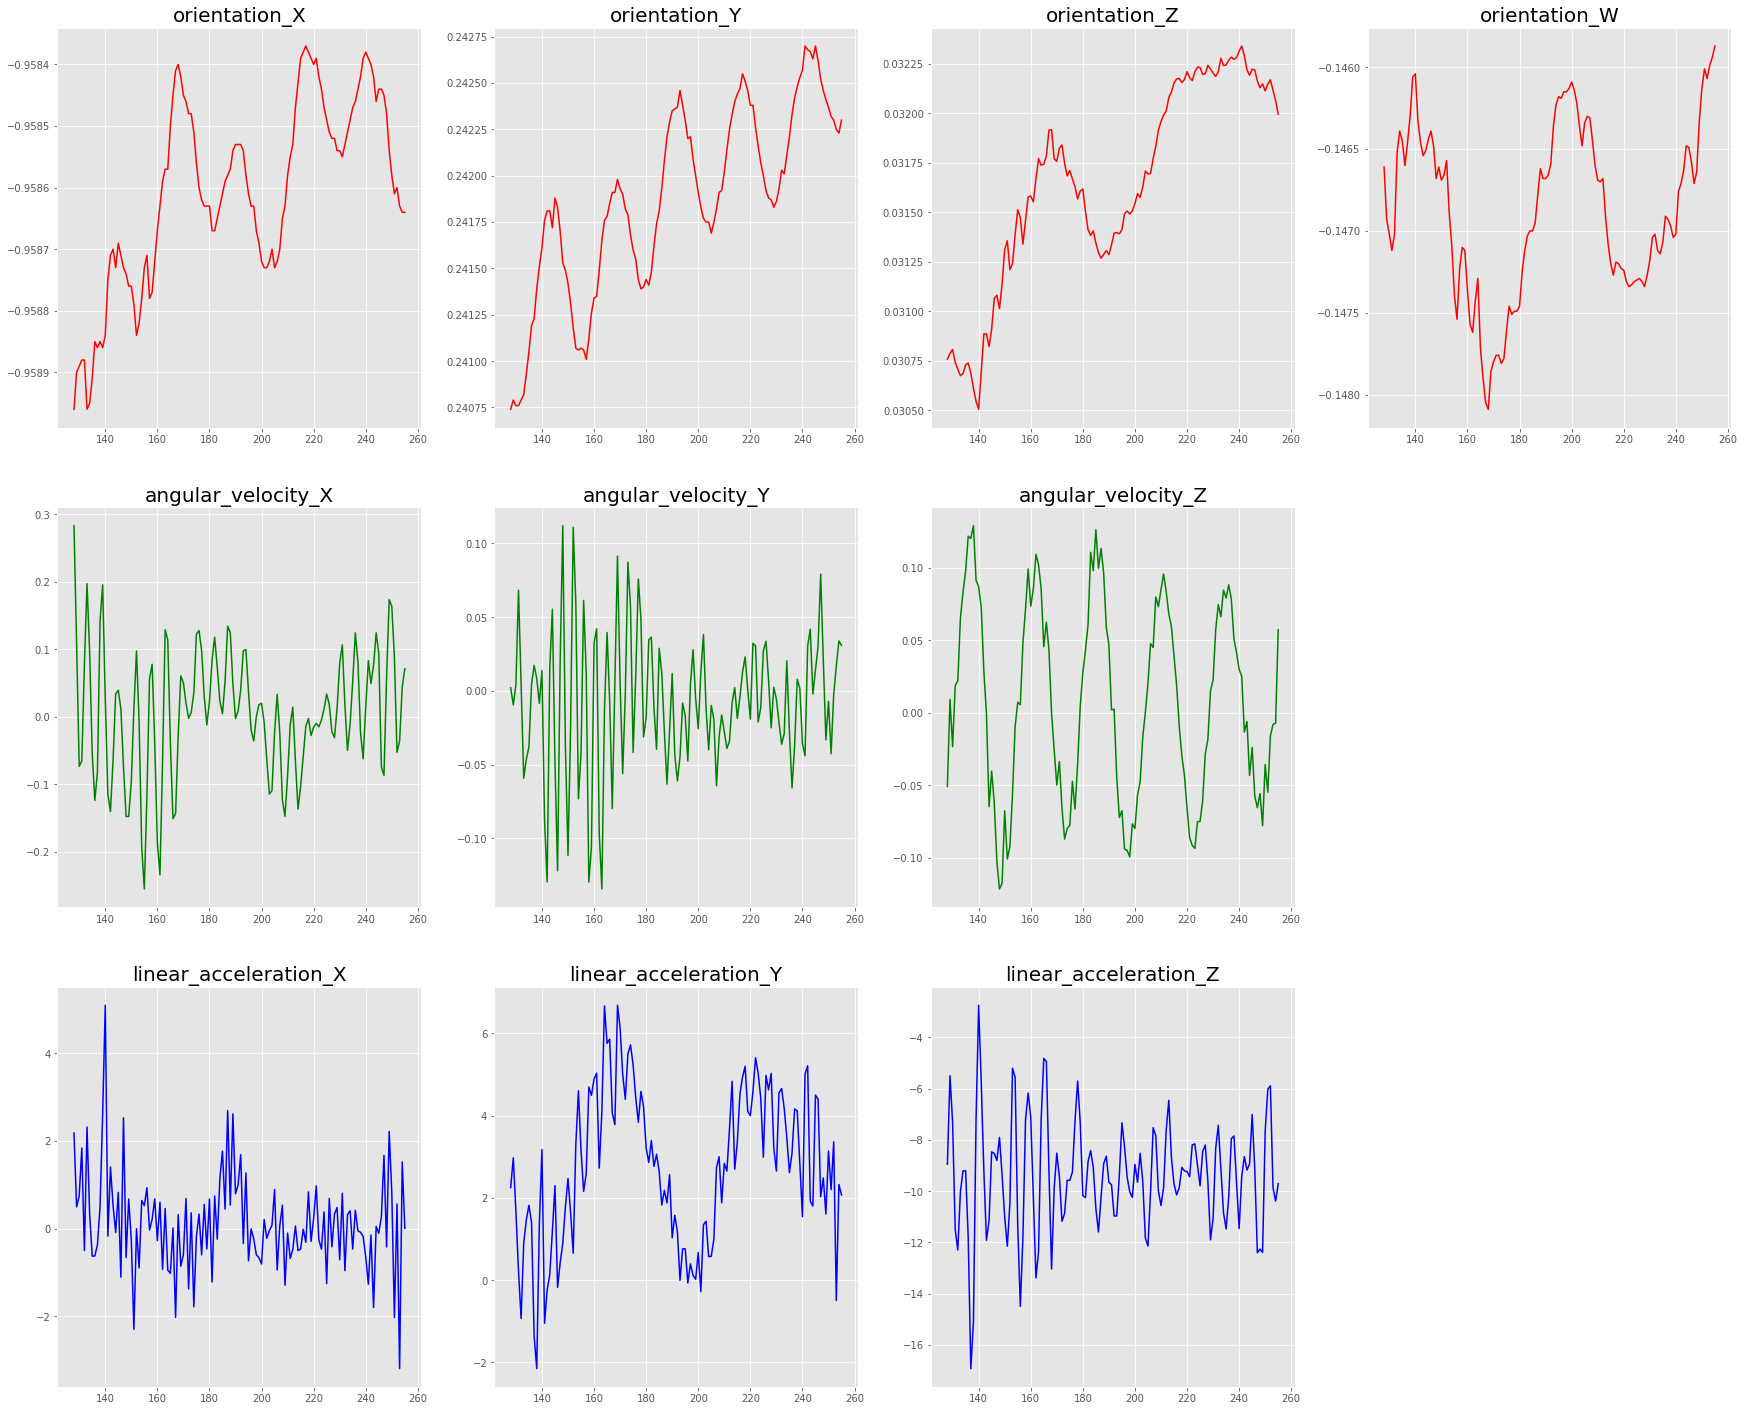

In [44]:
plot_series(1)

### De-noising DATA

In [45]:
def filter_signal(signal, threshold=1e3):
    fourier = np.fft.rfft(signal)
    frequencies = np.fft.rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return np.fft.irfft(fourier)

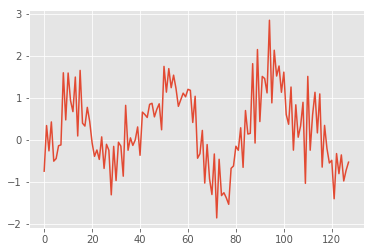

In [46]:
plt.plot(X_train.linear_acceleration_X[:128])

In [48]:
signal = (X_train.linear_acceleration_X[:128])

In [49]:
A = np.fft.fft(signal)

In [50]:
PSD = (A*np.conj(A))/len(A)

/home/akansh/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


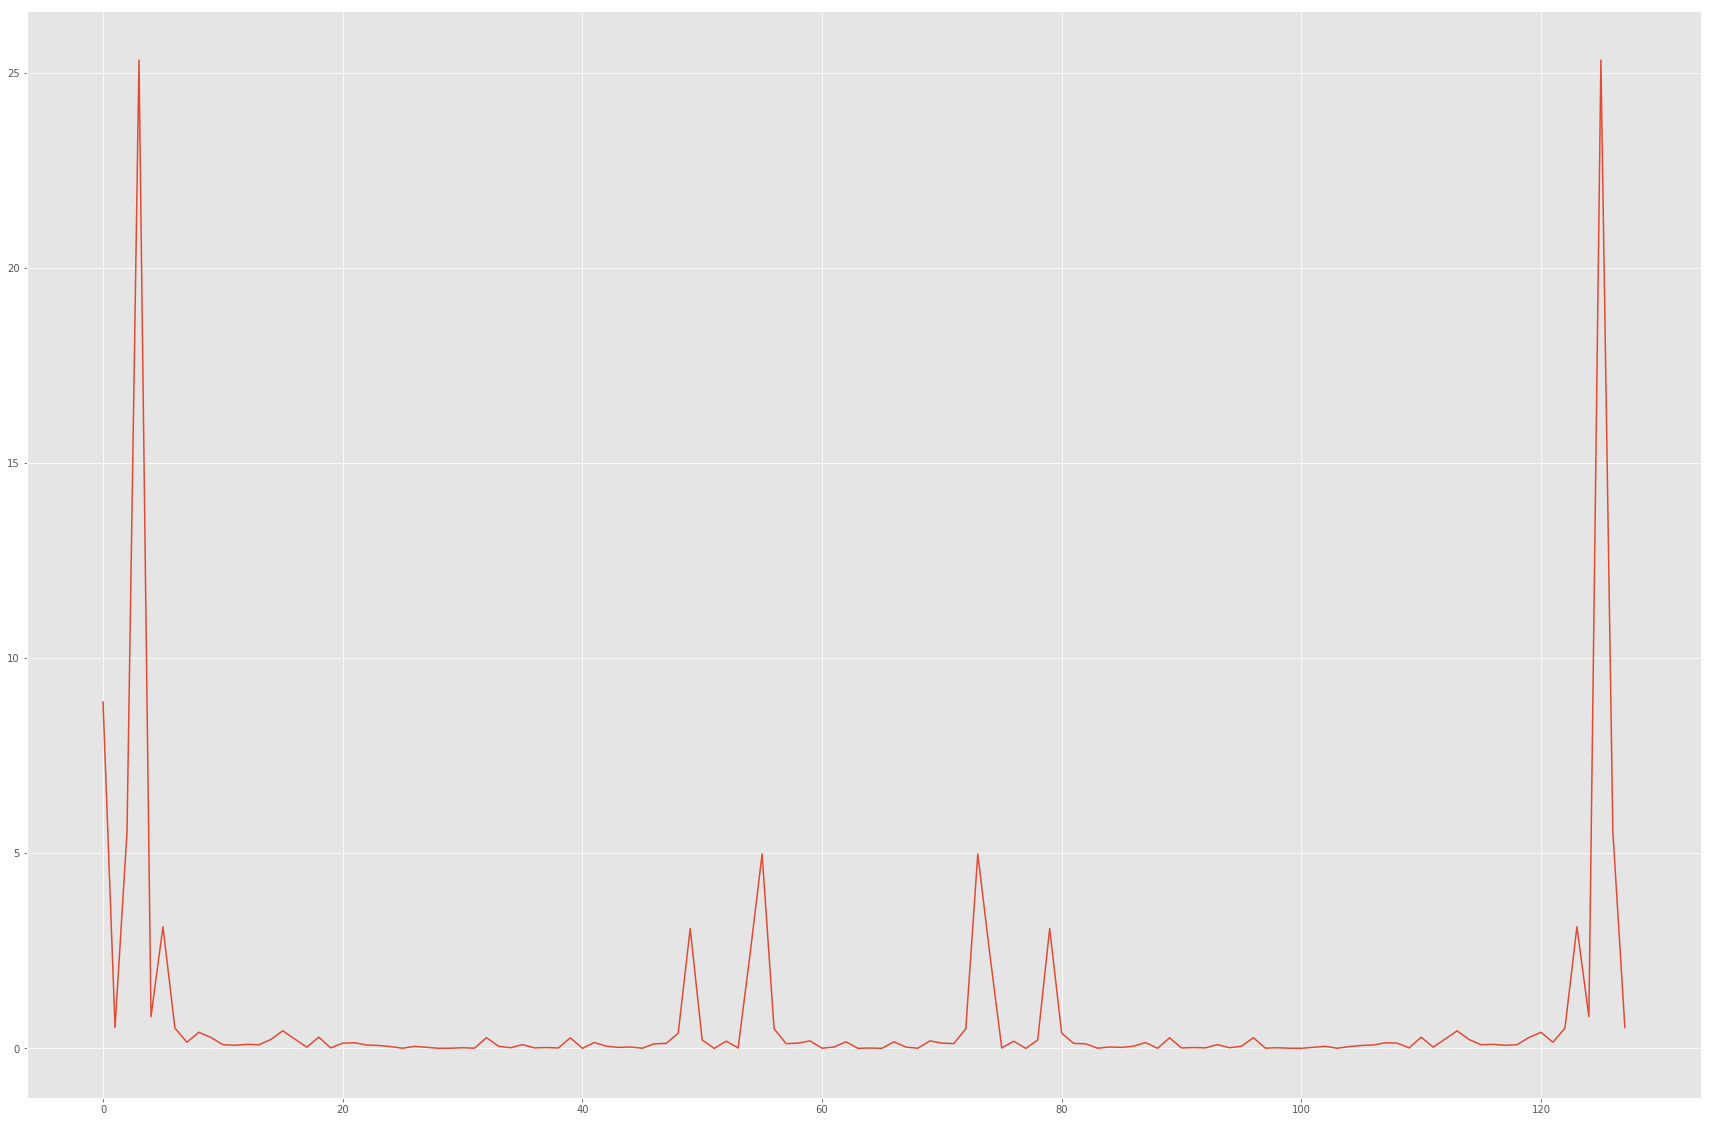

In [51]:
plt.figure(figsize = (30,20))
plt.plot(PSD)

In [36]:
np.mean(PSD)

(0.8931427528957513+0j)

In [52]:
indices = PSD > 5

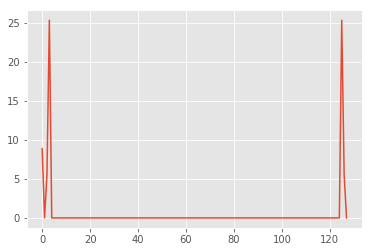

In [53]:
plt.plot((PSD*indices))

In [54]:
denoised_signal = np.fft.ifft(A*indices)

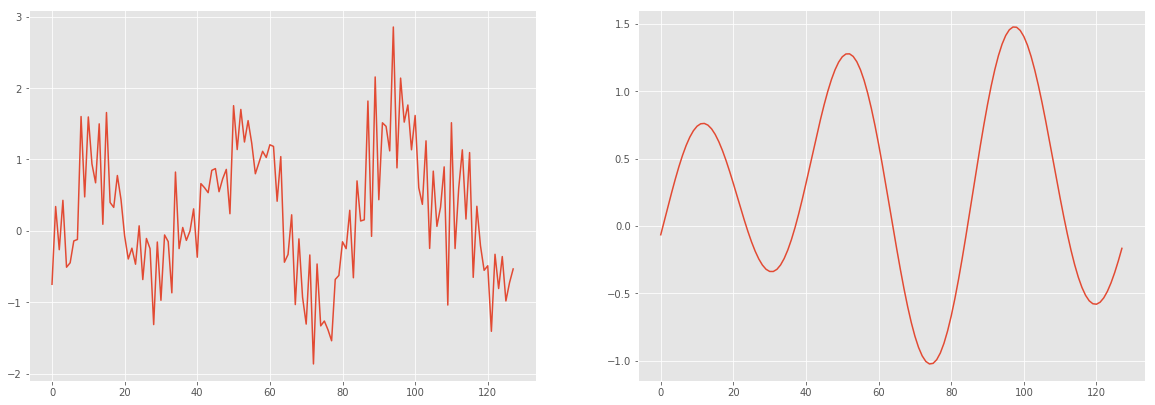

In [55]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(signal)
plt.subplot(2,2,2)
plt.plot(denoised_signal)